In [1]:
# 모델 관련 모듈 
import torch
import torch.nn as nn  
import torch.nn.functional as F  
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import torch.optim.lr_scheduler as lr_schedular
from torchinfo import summary 

from torchmetrics.classification import accuracy
from torchmetrics.classification import *
import torchvision.models as models 

# 데이터 분석 관련 모듈 로딩
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

# 이미지 관련 모듈 로딩
import cv2 
from PIL import Image
from torchvision.datasets import ImageFolder
from torchvision.transforms import v2

# 기타 모듈 로딩
import time
import os 


In [ ]:
# 활용 패키지 버전 체크 
print(f'torch  v.{torch.__version__}')
print(f'pandas v.{pd.__version__}')
print(f'numpy  v.{np.__version__}')

torch  v.2.4.1
pandas v.2.0.3
numpy  v.1.24.3


In [3]:
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

In [4]:
# 데이터 관련 변수 
DIR_PATH = './4fruits/'

In [5]:
# im
from torchvision import transforms

transConvert = transforms.Compose(
    [
        transforms.Resize(size=(342,342)),
        transforms.CenterCrop([299]),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
    ]
)

In [6]:
imgDS = ImageFolder(DIR_PATH, transform=transConvert)

In [7]:
print(f'imgDS.classes : {imgDS.classes}')
print(f'imgDS.class_to_idx : {imgDS.class_to_idx}')
print(f'imgDS.targets : {imgDS.targets}')

for img in imgDS.imgs:
    print(f'imgDs.imgs: {img}')

imgDS.classes : ['apple', 'banana', 'orange', 'strawberry']
imgDS.class_to_idx : {'apple': 0, 'banana': 1, 'orange': 2, 'strawberry': 3}
imgDS.targets : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [8]:
# print(round(len(imgDS) * 0.6))
# print(round(len(imgDS) * 0.3))
# print(round(len(imgDS) * 0.2))

In [9]:
# train, test 분리 

# 모듈 로딩 
from torch.utils.data import random_split

train_size = round(len(imgDS)*0.5)
valid_size = round(len(imgDS)*0.3)
test_size = len(imgDS) - train_size - valid_size
trainDS, validDS, testDS = random_split(imgDS, [train_size,valid_size,test_size])

trainDL = DataLoader(trainDS, batch_size=32, shuffle=True)
validDL = DataLoader(validDS, batch_size=32, shuffle=False)
testDL = DataLoader(testDS, batch_size=32, shuffle=False)



In [10]:
model = models.inception_v3(models.Inception_V3_Weights.IMAGENET1K_V1)

c:\Users\KDP19\anaconda3\envs\TORCH_CV_38\lib\site-packages\torchvision\models\_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(


In [11]:
print(model)

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

In [12]:
for named, param in model.named_parameters():
    param.requires_grad = False

In [13]:
model.fc =  nn.Linear(2048,4)

In [14]:
print(model)

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

In [15]:
for name, param in model.fc.named_parameters():
    print(f'[{name}] - {param.shape}')
    param.requires_grad = True

[weight] - torch.Size([4, 2048])
[bias] - torch.Size([4])


In [16]:
model = model.to(DEVICE)

In [17]:
# 최적화 인스턴스 
optimizer = optim.Adam(model.fc.parameters(),lr=0.001)

# 손실함수 인스턴스
loss_func = torch.nn.CrossEntropyLoss()

# 최적화 스케쥴링 인스턴스 생성 => lr 조절 및 성능 개선 여부 체크
schedular = lr_schedular.ReduceLROnPlateau(optimizer, mode='max', patience=10, verbose=True)

c:\Users\KDP19\anaconda3\envs\TORCH_CV_38\lib\site-packages\torch\optim\lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


In [18]:
num_epochs = 10

def train_model(model, loss_func, optimizer, is_train=True):
    
    loss_history = [[],[],[]]
    acc_history = [[],[],[]]
    f1score_history = [[],[],[]]

    for epoch in range(num_epochs):
        print(f'[EPOCH {epoch+1}/{num_epochs}]')
        print('-'*80)
        
        # 학습 모드로 모델 설정
        model.train()
        
        train_loss, train_score, train_acc = 0,0,0
        
        for featureTS, targetTS in trainDL:
            
            # DEVICE : CPU / GPU 사용
            featureTS = featureTS.to(DEVICE)
            targetTS = targetTS.to(DEVICE)
            
            # 학습 진행
            pre_y , aux_pre_y = model(featureTS)
            
            # 손실 계산 
            loss = loss_func.to(DEVICE)(pre_y, targetTS)
            train_loss += loss.item()
            
            # 예제 점수 계산법
            _, preds  = torch.max(pre_y,1)
            
            # 성능평가 계산 
            score = MulticlassF1Score(num_classes=4).to(DEVICE)(pre_y, targetTS)
            train_score += score.item()
            
            accuracy = MulticlassAccuracy(num_classes=4).to(DEVICE)(pre_y, targetTS)
            train_acc += accuracy.item()
            
            # 최적화 진행
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
            
        # 검증 모드로 모델 
        model.eval()
        valid_loss, valid_score, val_acc = 0,0,0
        
        with torch.no_grad():
            # 검증 데이터셋
            for feature, target in validDL:
                
                # CPU/GPU 사용
                feature = feature.to(DEVICE)
                target = target.to(DEVICE)
                
                # 평가
                pre_val = model(feature)
                
                # 손실
                loss = torch.nn.CrossEntropyLoss().to(DEVICE)(pre_val, target)
                valid_loss += loss.item()
                
                # 성능평가
                score = MulticlassF1Score(num_classes=4).to(DEVICE)(pre_val,target)
                valid_score += score.item()
                
                accuracy = MulticlassAccuracy(num_classes=4).to(DEVICE)(pre_y, targetTS)
                val_acc += accuracy.item()
        
        # 테스트 모델 
        with torch.no_grad():
            
            test_loss, test_score, test_acc = 0,0,0
            
            # 검증 데이터셋
            for feature, target in testDL:
                
                # CPU/GPU 사용
                feature = feature.to(DEVICE)
                target = target.to(DEVICE)
                
                # 평가
                pre_test = model(feature)
                
                # 손실
                loss = torch.nn.CrossEntropyLoss().to(DEVICE)(pre_test, target)
                test_loss += loss.item()
                
                # 성능평가
                score = MulticlassF1Score(num_classes=4).to(DEVICE)(pre_test,target)
                test_score += score
                
                # 정확도
                accuracy = MulticlassAccuracy(num_classes=4).to(DEVICE)(pre_y, targetTS)
                test_acc += accuracy.item()
            
        # train 손실 / 정확도 값 저장
        loss_history[0].append(train_loss/len(trainDL))
        f1score_history[0].append(train_score/len(trainDL))
        acc_history[0].append(train_acc/len(trainDL))
        
        # valid 손실 / 정확도 값 저장
        loss_history[1].append(valid_loss/len(validDL))
        f1score_history[1].append(valid_score/len(validDL))
        acc_history[1].append(val_acc/len(validDL))
    
        # test 손실 / 정확도 값 저장 
        loss_history[2].append(test_loss/len(testDL))
        f1score_history[2].append(test_score/len(testDL))
        acc_history[2].append(test_acc/len(testDL))
        
        # train 손실 
        print(f'- [TRAIN] LOSS : {loss_history[0][-1]} F1SCORE : {f1score_history[0][-1]} ACCURACY : {acc_history[0][-1]}')
        print(f'- [VALID] LOSS : {loss_history[1][-1]} F1SCORE : {f1score_history[0][-1]} ACCURACY : {acc_history[0][-1]}')
        print(f'- [TEST]  LOSS : {loss_history[2][-1]} F1SCORE : {f1score_history[0][-1]} ACCURACY : {acc_history[0][-1]}')
        
        ### 모델 저장 
        # 모델 경로 지정
        SAVE_PATH = '../KKM_models'
        
        # 파일 경로 만들기
        if not os.path.exists(SAVE_PATH):
            os.mkdir(SAVE_PATH)
        else:
            pass
        
        # 모델 이름 설정
        SAVE_MODEL = f'/model_num_loss({valid_loss:.4f}_score({valid_score:.4f}.pth))'
        
        # 모델 전체 저장
        if len(acc_history[1]) == 1:
            torch.save(model,SAVE_PATH+SAVE_MODEL)
        else:
            if acc_history[1][-1] > max(acc_history[1][:-1]):
                torch.save(model,SAVE_PATH+SAVE_MODEL)
        
        
        # 최적화 스케쥴러 
        schedular.step(valid_loss)
        
        # 성능 개선이 안되는 경우 조기 종료
        if schedular.num_bad_epochs >= schedular.patience:
            print(f'{schedular.patience} EPOCH 성능 개선이 없어서 조기종료함')
            break
        
    return loss_history, f1score_history, acc_history

In [19]:
# def train_model(model, loss_func, optimizer, is_train=True):

loss_history, f1score_history, acc_history = train_model(model,loss_func,optimizer,is_train=True )

[EPOCH 1/10]
--------------------------------------------------------------------------------


c:\Users\KDP19\anaconda3\envs\TORCH_CV_38\lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


- [TRAIN] LOSS : 0.4149262205350633 F1SCORE : 0.8650143938321694 ACCURACY : 0.8818515721294615
- [VALID] LOSS : 0.1711207437126533 F1SCORE : 0.8650143938321694 ACCURACY : 0.8818515721294615
- [TEST]  LOSS : 0.16163282284164818 F1SCORE : 0.8650143938321694 ACCURACY : 0.8818515721294615

[EPOCH 2/10]
--------------------------------------------------------------------------------
- [TRAIN] LOSS : 0.20409243573355518 F1SCORE : 0.9283217082615771 ACCURACY : 0.9419614300618764
- [VALID] LOSS : 0.1213852563953918 F1SCORE : 0.9283217082615771 ACCURACY : 0.9419614300618764
- [TEST]  LOSS : 0.11294634077637418 F1SCORE : 0.9283217082615771 ACCURACY : 0.9419614300618764

[EPOCH 3/10]
--------------------------------------------------------------------------------
- [TRAIN] LOSS : 0.1714237767569964 F1SCORE : 0.9382200229401682 ACCURACY : 0.9496144720541886
- [VALID] LOSS : 0.10365835633938728 F1SCORE : 0.9382200229401682 ACCURACY : 0.9496144720541886
- [TEST]  LOSS : 0.0965755564743668 F1SCORE : 

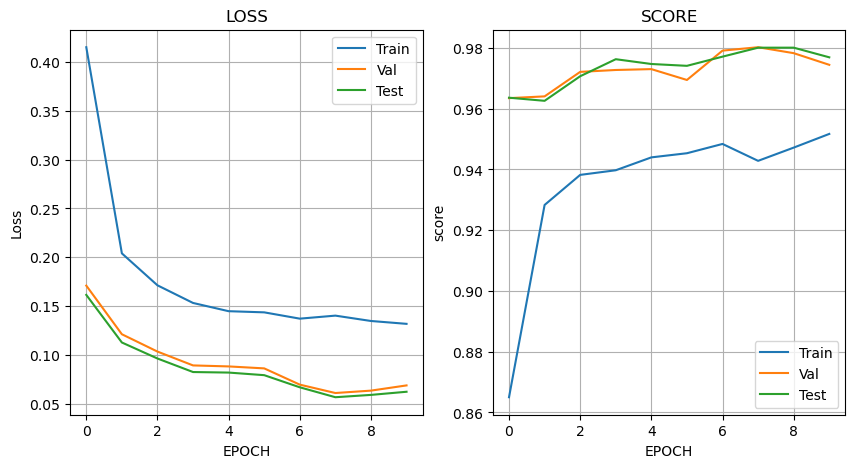

In [21]:
# 학습후 loss 시각화
TH = len(loss_history[0])
fg,axes=plt.subplots(1,2, figsize=(10,5), sharex=True)

axes[0].plot(range(TH), loss_history[0][:TH], label='Train')
axes[0].plot(range(TH), loss_history[1][:TH], label='Val')
axes[0].plot(range(TH), loss_history[2][:TH], label='Test')
axes[0].grid('--')
axes[0].legend()
axes[0].set_xlabel('EPOCH')
axes[0].set_ylabel('Loss')
axes[0].set_title('LOSS')

axes[1].plot(range(TH), f1score_history[0][:TH], label='Train')
axes[1].plot(range(TH), f1score_history[1][:TH], label='Val')
axes[1].plot(range(TH), f1score_history[2][:TH], label='Test')
axes[1].grid('--')
axes[1].legend()
axes[1].set_xlabel('EPOCH')
axes[1].set_ylabel('score')
axes[1].set_title('SCORE')
plt.show()
